In [1]:
#########################################################################################
# Solução do problema do caixeiro viajante através do ACO
# Prof. Dr. Rooney R. A. Coelho (PUC-SP)
#########################################################################################
import acopy # Biblioteca para a colônia de formigas
import networkx as nx # Biblioteca para Grafos
import tsplib95 # Biblioteca para interpretar os arquivos tsp (informações geográficas)

In [2]:
prob = tsplib95.load('bayg29.tsp') # Arquivo tsp com 29 cidades na Bavaria

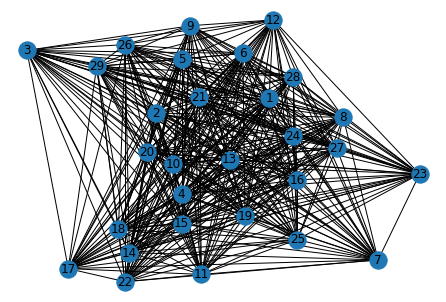

In [3]:
g = prob.get_graph() # Cria um grafo a partir do problema lido
coord = prob.display_data # Informação do arquivo tsp referente às localizações geográficas
nx.draw(g, coord, with_labels=True) # Gera o grafo com todas as rotas possíveis

In [4]:
# Configuração do solver
# rho: taxa de evaporação
# q: quantidade de ferômonio excretada por uma  formiga a cada iteração
solver = acopy.Solver(rho=0.03, q=1)

# Configuração das formigas
# alpha: influência do  feromônio e da informação heurística
# beta: influência da informação heurística (1/dij)
colony = acopy.Colony(alpha=1, beta=3) 

In [7]:
# Solucionar
# gen_size: quantidades de formigas (em branco é igual à quantidade de nós)
# limit: quantidade de iterações para parada 
tour = solver.solve(g, colony, limit = 200) 

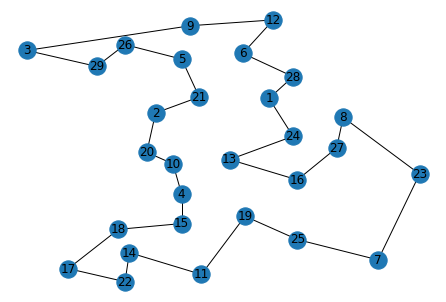

In [8]:
# Grafo para a melhor solução obtida
G = nx.Graph() 
G.add_nodes_from(g.nodes) # nós do grafo original
G.add_edges_from(tour.path) # arcos do melhor caminho
nx.draw(G,coord,with_labels=True)

In [9]:
# Distância calculada e melhor caminho 
tour

1642	1,24,13,16,27,8,23,7,25,19,11,14,22,17,18,15,4,10,20,2,21,5,26,29,3,9,12,6,28